## Evaluate ranking metrics before

ngc batch run --name "tranf4rec-htune-v06-gpt2" --preempt RUNONCE --ace nv-us-west-2 --instance dgx1v.32g.2.norm --commandline "nvidia-smi && wandb login 76eea90114bb1cdcbafe151b262e4a5d4ff60f12 && date && git pull origin experimentation && date && bash script/run_transformer_v2.bash htune-v06-gpt2 full_noneg session_cooccurrence --start_date 2019-10-01 --end_date 2019-10-15 --model_type gpt2 --loss_type cross_entropy --per_device_eval_batch_size 128 --similarity_type concat_mlp --tf_out_activation tanh --all_rescale_factor 1.0 --neg_rescale_factor 0.0 --inp_merge mlp --hidden_act gelu_new --learning_rate_warmup_steps 0 --learning_rate_num_cosine_cycles 4.0 --dataloader_drop_last --compute_metrics_each_n_steps 50 --max_seq_len 20 --num_train_epochs 8 --per_device_train_batch_size 64 --learning_rate 0.002765352013424135 --learning_rate_schedule constant_with_warmup --dropout 0.1 --weight_decay 3.1625564350525762e-06 --d_model 256 --n_layer 2 --n_head 2 --log_predictions --log_attention_weights && date" --result /results --image "nvidian/prj-recsys/transf4rec_exp:0.1.0" --org nvidian --team prj-recsys --datasetid 66609:/data

- Running it again logging predictions and attention weights
Id: 1516063

laced-fire-1297
https://wandb.ai/gspmoreira/huggingface/runs/2iqaecgb/overview?workspace=user-gspmoreira
AOD_all_Test_ndcg@1000_all: 0.5304

In [1]:
import os
import pandas as pd
import seaborn as sns

In [2]:
BASE_PATH = '1550863-ethereal-plasma-2074/pred_logs/'

In [3]:
preds_df = pd.read_parquet(os.path.join(BASE_PATH, 'preds_date_2019-10-07.parquet'))
len(preds_df)

10396

In [4]:
preds_df.columns

Index(['metadata_seq_len', 'metadata_seq_pos', 'metadata_sess_bid_seq',
       'metadata_sess_ccid_seq', 'metadata_sess_csid_seq',
       'metadata_sess_pid_seq', 'metadata_sess_product_recency_seq',
       'metric_all_avg_precision@10', 'metric_all_avg_precision@100',
       'metric_all_avg_precision@1000', 'metric_all_avg_precision@5',
       'metric_all_ndcg@10', 'metric_all_ndcg@100', 'metric_all_ndcg@1000',
       'metric_all_ndcg@5', 'metric_all_precision@10',
       'metric_all_precision@100', 'metric_all_precision@1000',
       'metric_all_precision@5', 'metric_all_recall@10',
       'metric_all_recall@100', 'metric_all_recall@1000',
       'metric_all_recall@5'],
      dtype='object')

In [5]:
preds_df

,metadata_seq_len,metadata_seq_pos,metadata_sess_bid_seq,metadata_sess_ccid_seq,metadata_sess_csid_seq,metadata_sess_pid_seq,metadata_sess_product_recency_seq,metric_all_avg_precision@10,metric_all_avg_precision@100,metric_all_avg_precision@1000,...,metric_all_ndcg@1000,metric_all_ndcg@5,metric_all_precision@10,metric_all_precision@100,metric_all_precision@1000,metric_all_precision@5,metric_all_recall@10,metric_all_recall@100,metric_all_recall@1000,metric_all_recall@5
0,[2],[2],[20],[131],[15],[538],[-1.5097283],0.0,0.010526,0.010526,...,0.151861,0.0,0.0,0.01,0.001,0.0,0.0,1.0,1.0,0.0
1,[8],[2],[93],[60],[116],[7939],[-1.4754924],0.0,0.000000,0.001047,...,0.101001,0.0,0.0,0.00,0.001,0.0,0.0,0.0,1.0,0.0
2,[8],[3],[2],[60],[116],[20803],[-1.5139599],0.0,0.022727,0.022727,...,0.182088,0.0,0.0,0.01,0.001,0.0,0.0,1.0,1.0,0.0
3,[8],[4],[1354],[60],[116],[56679],[-1.5640448],0.0,0.000000,0.003333,...,0.121453,0.0,0.0,0.00,0.001,0.0,0.0,0.0,1.0,0.0
4,[8],[5],[602],[60],[116],[74274],[-1.4996743],0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10391,[6],[2],[4305],[131],[229],[21934],[-1.4599785],1.0,1.000000,1.000000,...,1.000000,1.0,0.1,0.01,0.001,0.2,1.0,1.0,1.0,1.0
10392,[6],[3],[4305],[131],[229],[23159],[-1.4556218],0.0,0.000000,0.003906,...,0.124912,0.0,0.0,0.00,0.001,0.0,0.0,0.0,1.0,0.0
10393,[6],[4],[4305],[131],[229],[39673],[-1.4935377],0.0,0.000000,0.002632,...,0.116636,0.0,0.0,0.00,0.001,0.0,0.0,0.0,1.0,0.0
10394,[6],[5],[1377],[131],[300],[68894],[-1.5628753],0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0


In [6]:
COLS_TO_SQUEEZE = ['metadata_sess_pid_seq', 'metadata_seq_pos', 'metadata_seq_len']

for col in COLS_TO_SQUEEZE:
    print (col)
    preds_df[col] = preds_df[col].apply(lambda x: x[0])

metadata_sess_pid_seq
metadata_seq_pos
metadata_seq_len


## Analyzing metrics

In [7]:
metrics_Cols = ['metric_all_ndcg@1000', 'metric_all_avg_precision@1000', 'metric_all_recall@1000']

In [8]:
preds_df[metrics_Cols].mean()

metric_all_ndcg@1000             0.220149
metric_all_avg_precision@1000    0.111070
metric_all_recall@1000           0.753463
dtype: float64

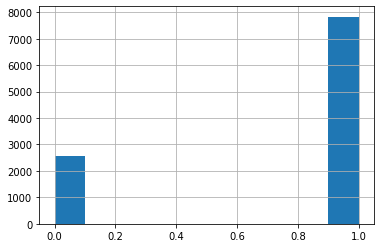

In [9]:
preds_df['metric_all_recall@1000'].hist()

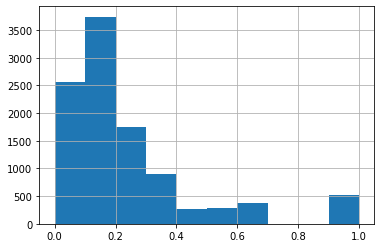

In [10]:
preds_df['metric_all_ndcg@1000'].hist()

In [11]:
preds_df.groupby('metric_all_ndcg@1000').size().sort_values(ascending=False)

metric_all_ndcg@1000
0.000000    2563
1.000000     523
0.630930     375
0.500000     282
0.430677     261
            ... 
0.106716       1
0.114049       1
0.106666       1
0.106568       1
0.107777       1
Length: 779, dtype: int64

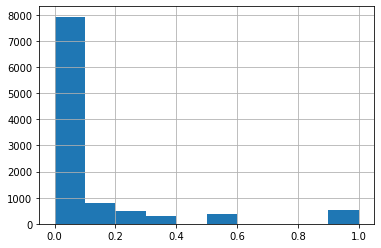

In [12]:
preds_df['metric_all_avg_precision@1000'].hist()

## Computing categ features popularity

In [13]:
days = []
for day in range(2,15):
    days.append(pd.read_parquet(os.path.join(BASE_PATH, 'preds_date_2019-10-{:02}.parquet'.format(day))))
    
preds_full_df = pd.concat(days)

for col in COLS_TO_SQUEEZE:
    print (col)
    preds_full_df[col] = preds_full_df[col].apply(lambda x: x[0])

metadata_sess_pid_seq
metadata_seq_pos
metadata_seq_len


In [16]:
pid_pop_df = preds_full_df.groupby('metadata_sess_pid_seq').size().to_frame('pid_count').reset_index()
pid_pop_df

NameError: name 'preds_full_df' is not defined

## Computing stats on models accuracy

In [14]:
preds_df = preds_df.merge(pid_pop_df, how='left')

NameError: name 'pid_pop_df' is not defined

In [15]:
preds_df.head(5)

,metadata_seq_len,metadata_seq_pos,metadata_sess_bid_seq,metadata_sess_ccid_seq,metadata_sess_csid_seq,metadata_sess_pid_seq,metadata_sess_product_recency_seq,metric_all_avg_precision@10,metric_all_avg_precision@100,metric_all_avg_precision@1000,...,metric_all_ndcg@1000,metric_all_ndcg@5,metric_all_precision@10,metric_all_precision@100,metric_all_precision@1000,metric_all_precision@5,metric_all_recall@10,metric_all_recall@100,metric_all_recall@1000,metric_all_recall@5
0,2,2,[20],[131],[15],538,[-1.5097283],0.0,0.010526,0.010526,...,0.151861,0.0,0.0,0.01,0.001,0.0,0.0,1.0,1.0,0.0
1,8,2,[93],[60],[116],7939,[-1.4754924],0.0,0.000000,0.001047,...,0.101001,0.0,0.0,0.00,0.001,0.0,0.0,0.0,1.0,0.0
2,8,3,[2],[60],[116],20803,[-1.5139599],0.0,0.022727,0.022727,...,0.182088,0.0,0.0,0.01,0.001,0.0,0.0,1.0,1.0,0.0
3,8,4,[1354],[60],[116],56679,[-1.5640448],0.0,0.000000,0.003333,...,0.121453,0.0,0.0,0.00,0.001,0.0,0.0,0.0,1.0,0.0
4,8,5,[602],[60],[116],74274,[-1.4996743],0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0


### Analyzing correlation between accuracy and label metadata stats

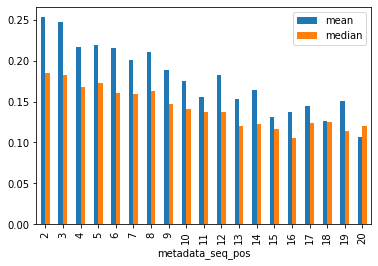

In [16]:
preds_df.groupby('metadata_seq_pos')['metric_all_ndcg@1000'].agg(['mean', 'median']).plot.bar()

In [18]:
pd.set_option("display.max_rows", None)
preds_df.groupby(['metadata_seq_len', 'metadata_seq_pos'])['metric_all_ndcg@1000'].agg(['mean'])

mean
metadata_seq_len metadata_seq_pos          
2                2                 0.255638
3                2                 0.258106
                 3                 0.257996
4                2                 0.264304
                 3                 0.243323
                 4                 0.221293
5                2                 0.258441
                 3                 0.255607
                 4                 0.213715
                 5                 0.231536
6                2                 0.262897
                 3                 0.265564
                 4                 0.228871
                 5                 0.251383
                 6                 0.219796
7                2                 0.245120
                 3                 0.231323
                 4                 0.221358
                 5                 0.240763
                 6                 0.227888
                 7                 0.190392
8                2                 0.250588
                 3                 0.238227
                 4                 0.241005
                 5                 0.207887
                 6                 0.217831
                 7                 0.189537
                 8                 0.198799
9                2                 0.192368
                 3                 0.204070
                 4                 0.191376
                 5                 0.196017
                 6                 0.227069
                 7                 0.210760
                 8                 0.216453
                 9                 0.200752
10               2                 0.242334
                 3                 0.231997
                 4                 0.222467
                 5                 0.179849
                 6                 0.204425
                 7                 0.223078
                 8                 0.188965
                 9                 0.201533
                 10                0.179943
11               2                 0.233207
                 3                 0.201367
                 4                 0.222968
                 5                 0.241858
                 6                 0.223103
                 7                 0.220683
                 8                 0.227027
                 9                 0.179394
                 10                0.216138
                 11                0.150558
12               2                 0.270269
                 3                 0.272202
                 4                 0.208428
                 5                 0.197831
                 6                 0.221930
                 7                 0.212982
                 8                 0.320933
                 9                 0.166861
                 10                0.161197
                 11                0.184558
                 12                0.176533
13               2                 0.253970
                 3                 0.279375
                 4                 0.178150
                 5                 0.275951
                 6                 0.242564
                 7                 0.219094
                 8                 0.225202
                 9                 0.215325
                 10                0.214135
                 11                0.191132
                 12                0.252947
                 13                0.183123
14               2                 0.228934
                 3                 0.268804
                 4                 0.220284
                 5                 0.184206
                 6                 0.239269
                 7                 0.131800
                 8                 0.199295
                 9                 0.141906
                 10                0.146686
                 11                0.126887
                 12                0.136193
                 13                

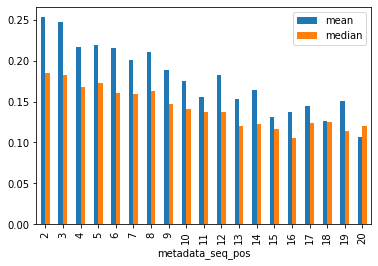

In [19]:
preds_df.groupby('metadata_seq_pos')['metric_all_ndcg@1000'].agg(['mean', 'median']).plot.bar()

In [20]:
preds_df['ndcg@1000_bin'] = pd.cut(preds_df['metric_all_ndcg@1000'], 4)

In [21]:
preds_df.groupby('ndcg@1000_bin').size()

ndcg@1000_bin
(-0.001, 0.25]    7468
(0.25, 0.5]       2030
(0.5, 0.75]        375
(0.75, 1.0]        523
dtype: int64

In [22]:
preds_df.groupby('ndcg@1000_bin')[['metadata_seq_pos',
                                   'pid_count']].agg(['mean', 'median'])

KeyError: "Columns not found: 'pid_count'"

In [23]:
preds_df[['metric_all_ndcg@1000', 'metadata_seq_pos', 'pid_count']] \
     .corr(method='spearman')['metric_all_ndcg@1000']

KeyError: "['pid_count'] not in index"

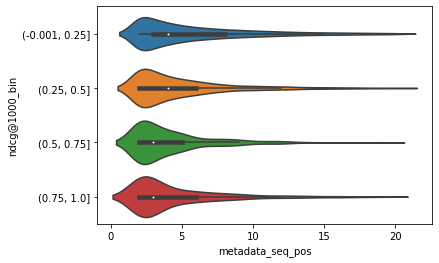

In [24]:
ax = sns.violinplot(x='metadata_seq_pos', y='ndcg@1000_bin', data=preds_df)

In [25]:
ax = sns.violinplot(x='pid_count', y='ndcg@1000_bin', data=preds_df)

ValueError: Could not interpret input 'pid_count'

In [ ]:
preds_df.plot.scatter(y='pid_count', x='metric_all_ndcg@1000')

In [ ]:
preds_df.plot.scatter(y='metadata_seq_pos', x='metric_all_ndcg@1000')